In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df = df.drop(['User ID'],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age'>

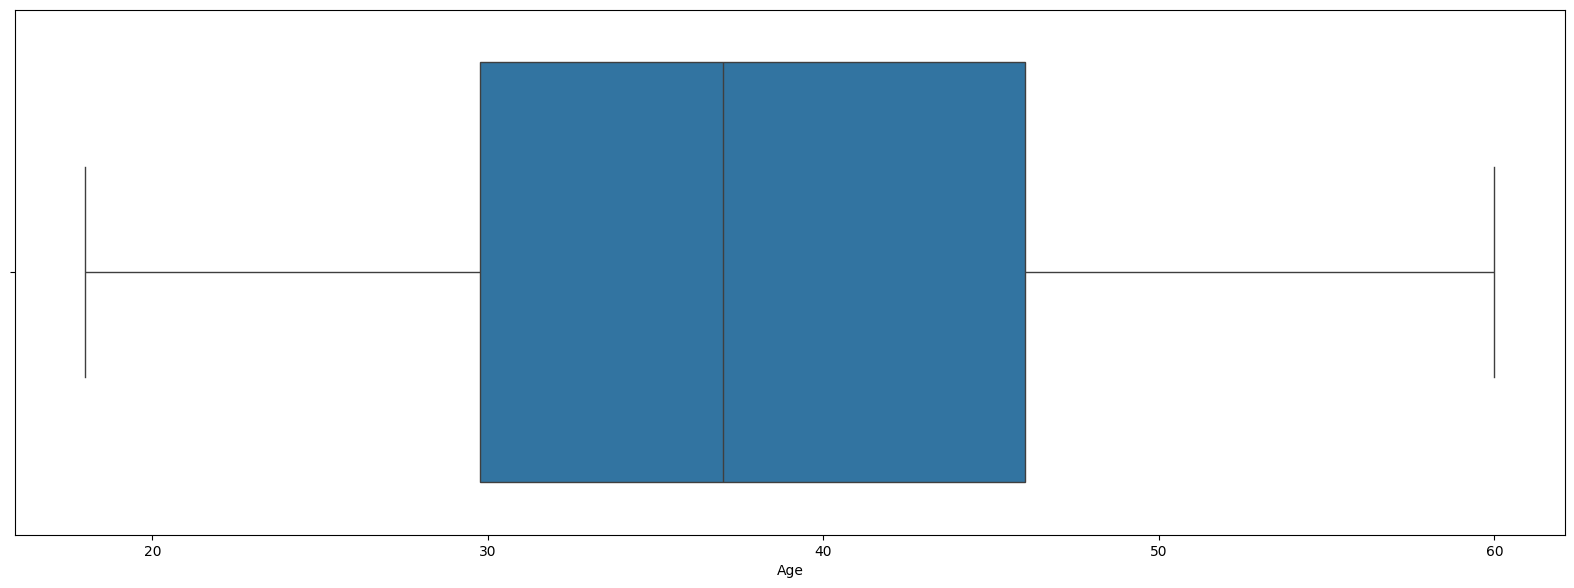

In [8]:
# Checking outliers
import matplotlib.pyplot as plt
import seaborn as sns
# Math score
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(data=df,x=df['Age'])

<Axes: xlabel='EstimatedSalary'>

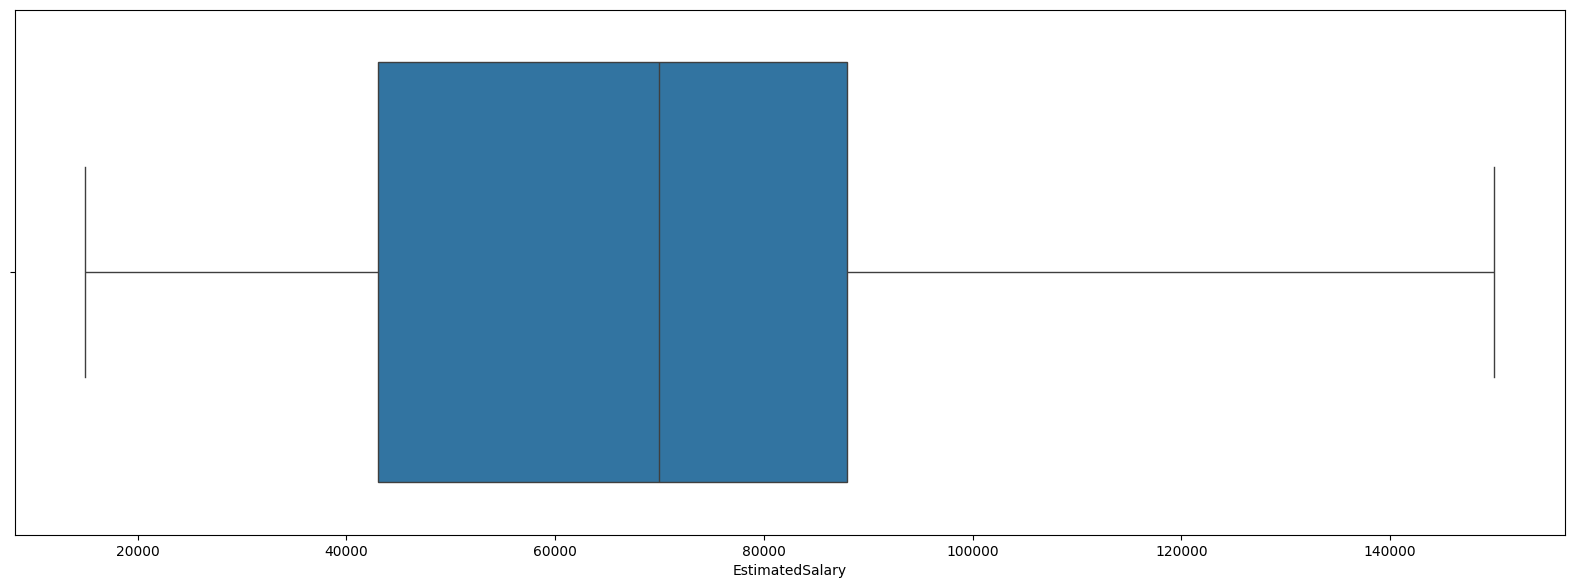

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Math score
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(data=df,x=df['EstimatedSalary'])

In [10]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
from sklearn.model_selection import train_test_split
x = df.drop(['Purchased'],axis=1)
y = df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
# Applying model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=16)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[75,  5],
       [14, 26]])

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
meanAbsErr = mean_absolute_error(y_test,y_pred)
rootMeanSquErr = np.sqrt(mean_squared_error(y_test,y_pred))
meanSquErr = mean_squared_error(y_test,y_pred)
score = accuracy_score(y_test,y_pred)

In [16]:
score

0.8416666666666667

In [17]:
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
tn = cnf_matrix[1][1]

print("true positive -" , tp)
print("false positive -" , fp)
print("false negative -" , fn)
print("true negative -" , tn)

true positive - 75
false positive - 5
false negative - 14
true negative - 26


In [18]:
np.array(y_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [19]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        80
           1       0.84      0.65      0.73        40

    accuracy                           0.84       120
   macro avg       0.84      0.79      0.81       120
weighted avg       0.84      0.84      0.84       120



<Axes: xlabel='Age', ylabel='Purchased'>

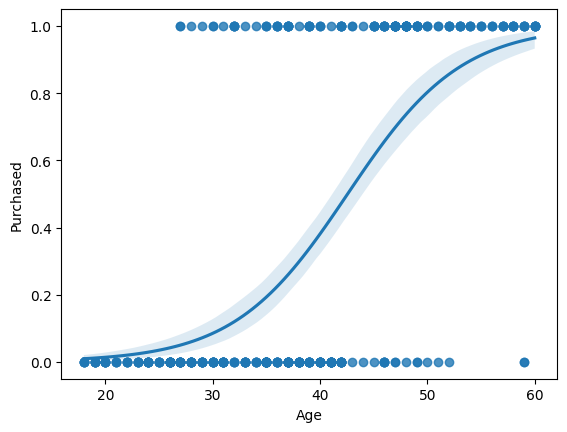

In [21]:
import seaborn as sns
sns.regplot(x='Age', y='Purchased', data=df, logistic=True)